In [1]:
from game import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
game_settings = BIG_tool_use_advanced_2_5

In [3]:
game_settings.gameSize = 224 # rewrite this small portion

In [4]:
G = discreteGame(game_settings)

In [5]:
import matplotlib.pyplot as plt

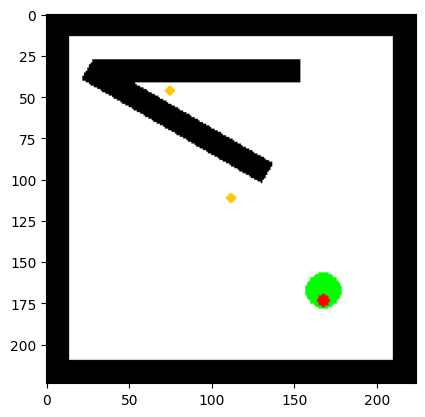

In [6]:
plt.imshow(G.getData())

In [7]:
img_set = G.random_full_image_set(restrict_angles=True)

In [8]:
img_set.shape

(40, 224, 224, 3)

In [9]:
from visual_transformer import *

In [10]:
brain = DefaultAgentBrain().cuda()

In [11]:
# now, let's try the image autoencoder feature

In [12]:
img_tensor = torch.permute(torch.FloatTensor(img_set[:10]).cuda(), (0, 3, 1, 2))

In [13]:
img_tensor.device

device(type='cuda', index=0)

In [14]:
img_tensor.size()

torch.Size([10, 3, 224, 224])

In [15]:
# ok, now let's see if even the inference side fits on device

In [16]:
reconstruction = brain.img_autoencoder(img_tensor)

/home/atbolsh/anaconda3/envs/llava-florence/lib/python3.12/site-packages/torch/_tensor.py:955: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [17]:
# Nope. Now, let's find those sweet limits
#(limit seems to be 10 for inference, maybe a little higher)
# still seeking limit for training

In [18]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

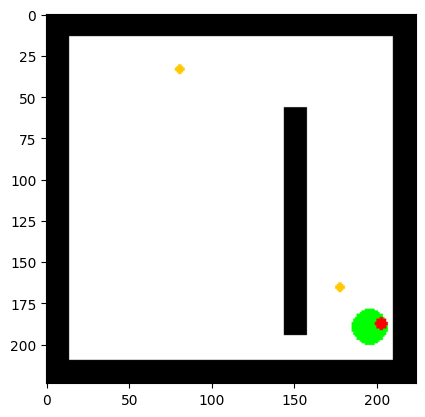

In [19]:
quick_display(img_tensor[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.9622827..2.5883179].


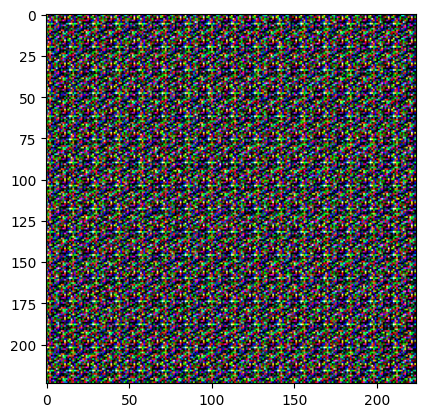

In [20]:
quick_display(reconstruction[0])

In [22]:
lossfunc = nn.MSELoss()

In [25]:
L = lossfunc(reconstruction, img_tensor)

In [26]:
L.backward()

In [27]:
# ok, this might actually work; this hasn't broken the memory limits yet.
# 5 gigs at 10 images.
# Let's see how this holds up with text